# Example: Regression with `QNNRegressor` and Variance Regularization

In this example we show how to train the `QNNRegressor` to fit a logarithm. We will also use this demonstrator to show how Variance Regularization can reduce noise and improve fit quality.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import IsingHamiltonian
from squlearn.qnn import QNNRegressor, SquaredLoss, VarianceLoss
from squlearn.optimizers import SLSQP

We will use Qiskit's `StatevectorSimulator` for trainning.

In [2]:
executor = Executor("statevector_simulator")

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


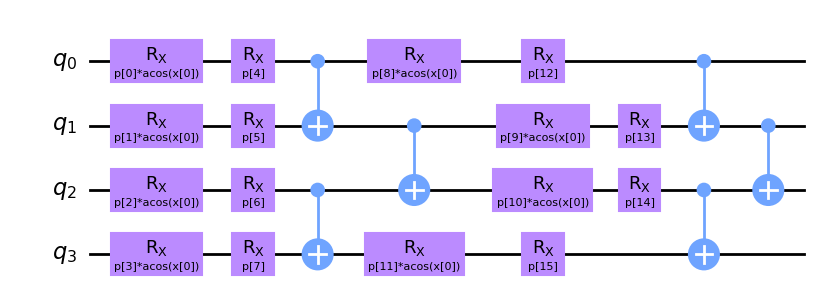

In [3]:
nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

We also need an observable

In [4]:
ising_op = IsingHamiltonian(nqubits, I="S", Z="S", ZZ="S")
print(ising_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[1]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[1]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2])])


Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `SLSQP` as the loss function and optimizer respectively. Finally we specify random initial parameters for both, the PQC and cost operator.

We will further specify a variance factor of $0.0005$, which will result in the models variance getting added to the loss function.

In [5]:
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.random.rand(ising_op.num_parameters)

reg = QNNRegressor(
    pqc,
    ising_op,
    executor,
    SquaredLoss(),
    SLSQP(),
    param_ini,
    param_op_ini,
    variance=0.0005,
)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class

## Training

Now we are ready to train the model to fit the logarithm funciton

In [6]:
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)

reg.fit(x_space, ref_values)

fit: 100%|██████████| 100/100 [00:38<00:00,  2.78it/s]

## Evaluation

Let's check the trained parameters of the PQC and operator

In [7]:
print("Result PQC params:", reg.param)
print("Result operator params:", reg.param_op)

Result PQC params: [ 3.41140485  0.63919198  4.40024487  1.25575045 -2.35552132 -0.05039776
 -4.22920846 -0.19041726  0.2196308   0.78396008  3.04969339  0.58845072
 -0.52744319 -1.5521323  -2.08362165 -0.28609583]
Result operator params: [-1.57472712  0.88044264 -0.27075229]


Also let's plot the predicted function vs. the actual logarithm function

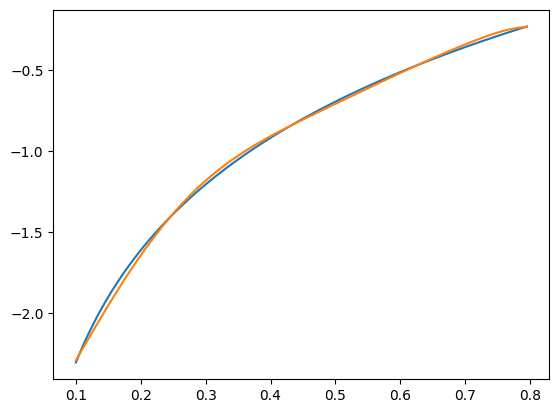

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

Let's also plot the error of the QNN.

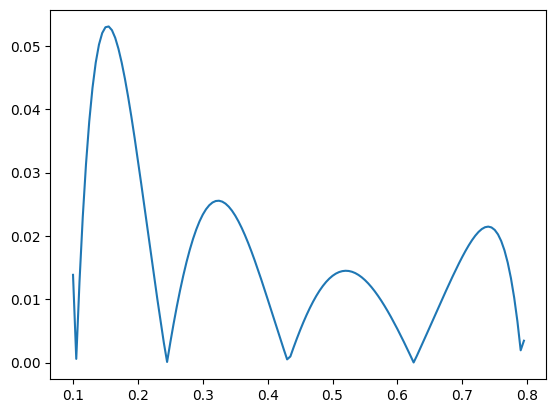

In [9]:
plt.plot(x, np.abs(y - np.log(x)))

## Evaluation on noisy simulator

Finally let's evaluate the trained `QNNRegressor` on Qiskit's `QasmSimulator`.

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class

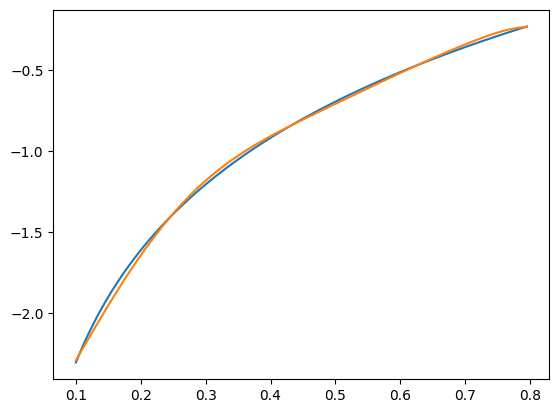

In [10]:
qasm = Executor("qasm_simulator")
qnn_qasm = QNNRegressor(
    pqc, ising_op, qasm, [SquaredLoss, VarianceLoss], SLSQP(), reg.param, reg.param_op
)
qnn_qasm._is_fitted = True
y = qnn_qasm.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

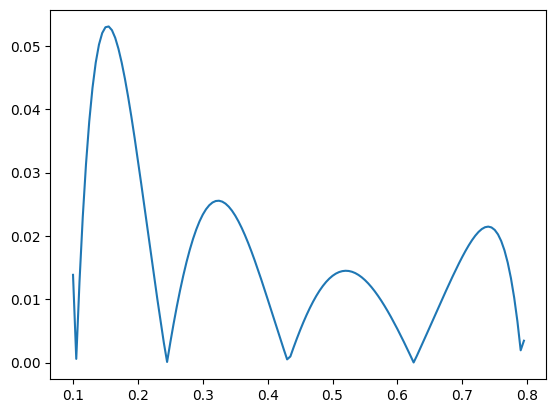

In [11]:
plt.plot(x, np.abs(y - np.log(x)))

We can see that the model is subject to less noise, than without variance regularization.